In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)            

In [2]:
data = mnist.load_data()
print("Shape: ", np.shape(data))
(train_images, train_labels), (test_images, test_labels) = data

Shape:  (2, 2)


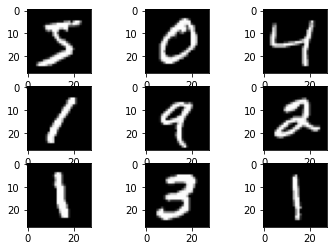


Training Images Shape: (60000, 28, 28)
Training Labels: [5 0 4 1 9 2 1 3 1]
Training Labels Shape: (60000,)


In [3]:
digits = train_images[0:9]
for i in range(9):
  plt.subplot(331 + i) # I'm doing a 3x3 grid, since it's 9 numbers and I think it'll look prettier
  plt.imshow(digits[i], cmap = 'gray')
plt.show()
print("\nTraining Images Shape:", train_images.shape)
print("Training Labels:", train_labels[0:9])
print("Training Labels Shape:", train_labels.shape)

In [4]:
class Model(tf.keras.Model):
    def __init__(self) -> None:
        super(Model, self).__init__()
        self.layer1 = tf.keras.layers.Dense(512, activation = 'relu', input_shape = (784, ))
        # It's interesting - I did input_shape = (28*28, ) and my accuracy was 0.11; changed it to input_shape = (784, ) and my accuracy went up to >0.9. Not sure why
        self.layer2 = tf.keras.layers.Dense(10, activation = 'softmax')

    def call(self, input: np.array) -> tf.Tensor:
        input = self.layer1(input)
        input = self.layer2(input)
        return input

In [5]:
loss_func = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
# I haven't tested different learning rates so I'm sticking with lr 0.01 and momentum 0

Cross log entropy is best when used for classifying data, which we are doing here. I am using the Categorical crossentropy as opposed to the Binary, as we have 10 classes (digits 0-9) as opposed to 2, which is when Binary works best. I am using Categorical as opposed to SparseCategorical, since Categorical requires one-hot encoding which I have done (below), while SparseCategorical takes integers.

I'm using SGD as it generalizes the best and uses the least resources; we don't need a crazy optimizer like Adam for our relatively simple data.

In [6]:
model = Model()
model.compile(optimizer = optimizer, loss = loss_func, metrics = ["accuracy"])

 Why did the programmer quit his job?

He didn't get arrays (a raise haha)

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We reshape data because our layers require the data to be in a certain shape, so the reshape function fits our data into that format. We cast the type to 32-bit float in order to have the data be usable with our mathematical functions.

In [8]:
tf_train_labels = to_categorical(train_labels)
tf_test_labels = to_categorical(test_labels)

Categorical variables store the variables as instances of a category - for example, a categorical variable might be a color or a city. Each category is assigned a binary vector (when one-hotting), with all 0's except for the position of the assigned category which is 1, so that we can better group our labels; the optimizers also require numerical arguments, so if our labels are strings, it won't work.

In [9]:
def one_hot_encoding(input: np.array) -> np.array:
    onehot = np.zeros(shape = (input.size, np.amax(input) + 1))
    for n in range(input.size):
      onehot[n][input[n]] = 1
    return onehot

In [10]:
assert np.array_equal(tf_train_labels, one_hot_encoding(train_labels))
assert np.array_equal(tf_test_labels, one_hot_encoding(test_labels))

In [11]:
model.fit(train_images, tf_train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 1.1293 - accuracy: 0.7457
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5287 - accuracy: 0.8714
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4221 - accuracy: 0.8898
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3741 - accuracy: 0.8999
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3449 - accuracy: 0.9061
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3242 - accuracy: 0.9100
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3082 - accuracy: 0.9138
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2950 - accuracy: 0.9175
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2837 - accuracy: 0.9209
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2737 - accuracy: 0.9240

How many software engineers does it take to change a light bulb?

None that's a hardware problem hahaaa

In [12]:
test_loss, test_acc = model.evaluate(test_images, tf_test_labels)
print('testAccuracy', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2594 - accuracy: 0.9285
testAccuracy 0.9284999966621399


In [13]:
def predict(model: tf.keras.Model, image: np.array) -> int:
    return model(image).numpy().argmax()

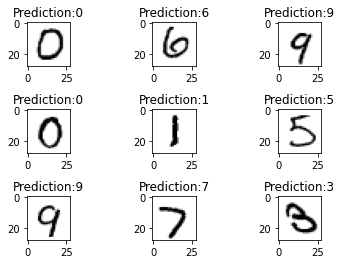

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for i in range(9):
    digit = test_images[10 + i]
    temp = plt.subplot(331 + i)
    digit2 = digit.reshape((1, 28 * 28))
    digit2 = digit2.astype("float32") / 255
    str1 = "Prediction:" + str(predict(model, digit2))
    temp.title.set_text(str1)
    temp.imshow(digit, cmap = plt.cm.binary)
plt.subplots_adjust(wspace = 0.5, hspace = 1)
plt.show()
